<a href="https://colab.research.google.com/github/hv4626/Stock_Market_Prediction/blob/main/StockMarketPrediction_SoC'22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf 
from sklearn.model_selection import train_test_split  
import cv2 
import io

In [82]:
from google.colab import files
uploaded = files.upload()


Saving GOOG_train.csv to GOOG_train (1).csv


In [84]:
df= pd.read_csv("GOOG_train.csv", index_col = "Date", parse_dates = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-10,719.469971,725.890015,716.429993,719.409973,719.409973,1216400
2016-06-13,716.510010,725.440002,716.510010,718.359985,718.359985,1258900
2016-06-14,716.479980,722.469971,713.119995,718.270020,718.270020,1306100
2016-06-15,719.000000,722.979980,717.309998,718.919983,718.919983,1214500
2016-06-16,714.909973,716.650024,703.260010,710.359985,710.359985,1982500


In [85]:
df.isnull()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-10,False,False,False,False,False,False
2016-06-13,False,False,False,False,False,False
2016-06-14,False,False,False,False,False,False
2016-06-15,False,False,False,False,False,False
2016-06-16,False,False,False,False,False,False
...,...,...,...,...,...,...
2021-06-03,False,False,False,False,False,False
2021-06-04,False,False,False,False,False,False
2021-06-07,False,False,False,False,False,False


In [86]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-06-10 to 2021-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [88]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1212.412150,1224.570048,1201.347431,1213.457483,1213.457483,1.610740e+06
std,379.454923,384.609149,375.747847,380.308660,380.308660,7.031610e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,957.377518,963.404984,950.767502,958.119980,958.119980,1.184300e+06
50%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,1.423200e+06
75%,1357.785034,1372.300995,1346.885010,1358.957519,1358.957519,1.823950e+06
max,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,6.207000e+06


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999570  0.999492  0.999070   0.999070 -0.023424
High       0.999570  1.000000  0.999347  0.999523   0.999523 -0.014560
Low        0.999492  0.999347  1.000000  0.999580   0.999580 -0.037282
Close      0.999070  0.999523  0.999580  1.000000   1.000000 -0.027679
Adj Close  0.999070  0.999523  0.999580  1.000000   1.000000 -0.027679
Volume    -0.023424 -0.014560 -0.037282 -0.027679  -0.027679  1.000000


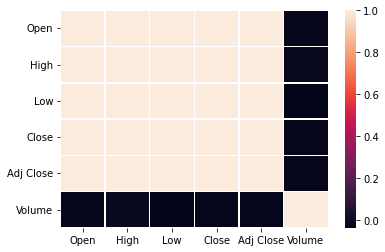

In [89]:
sns.heatmap(df.corr(), cbar=True, linewidths=0.5)
print(df.corr())

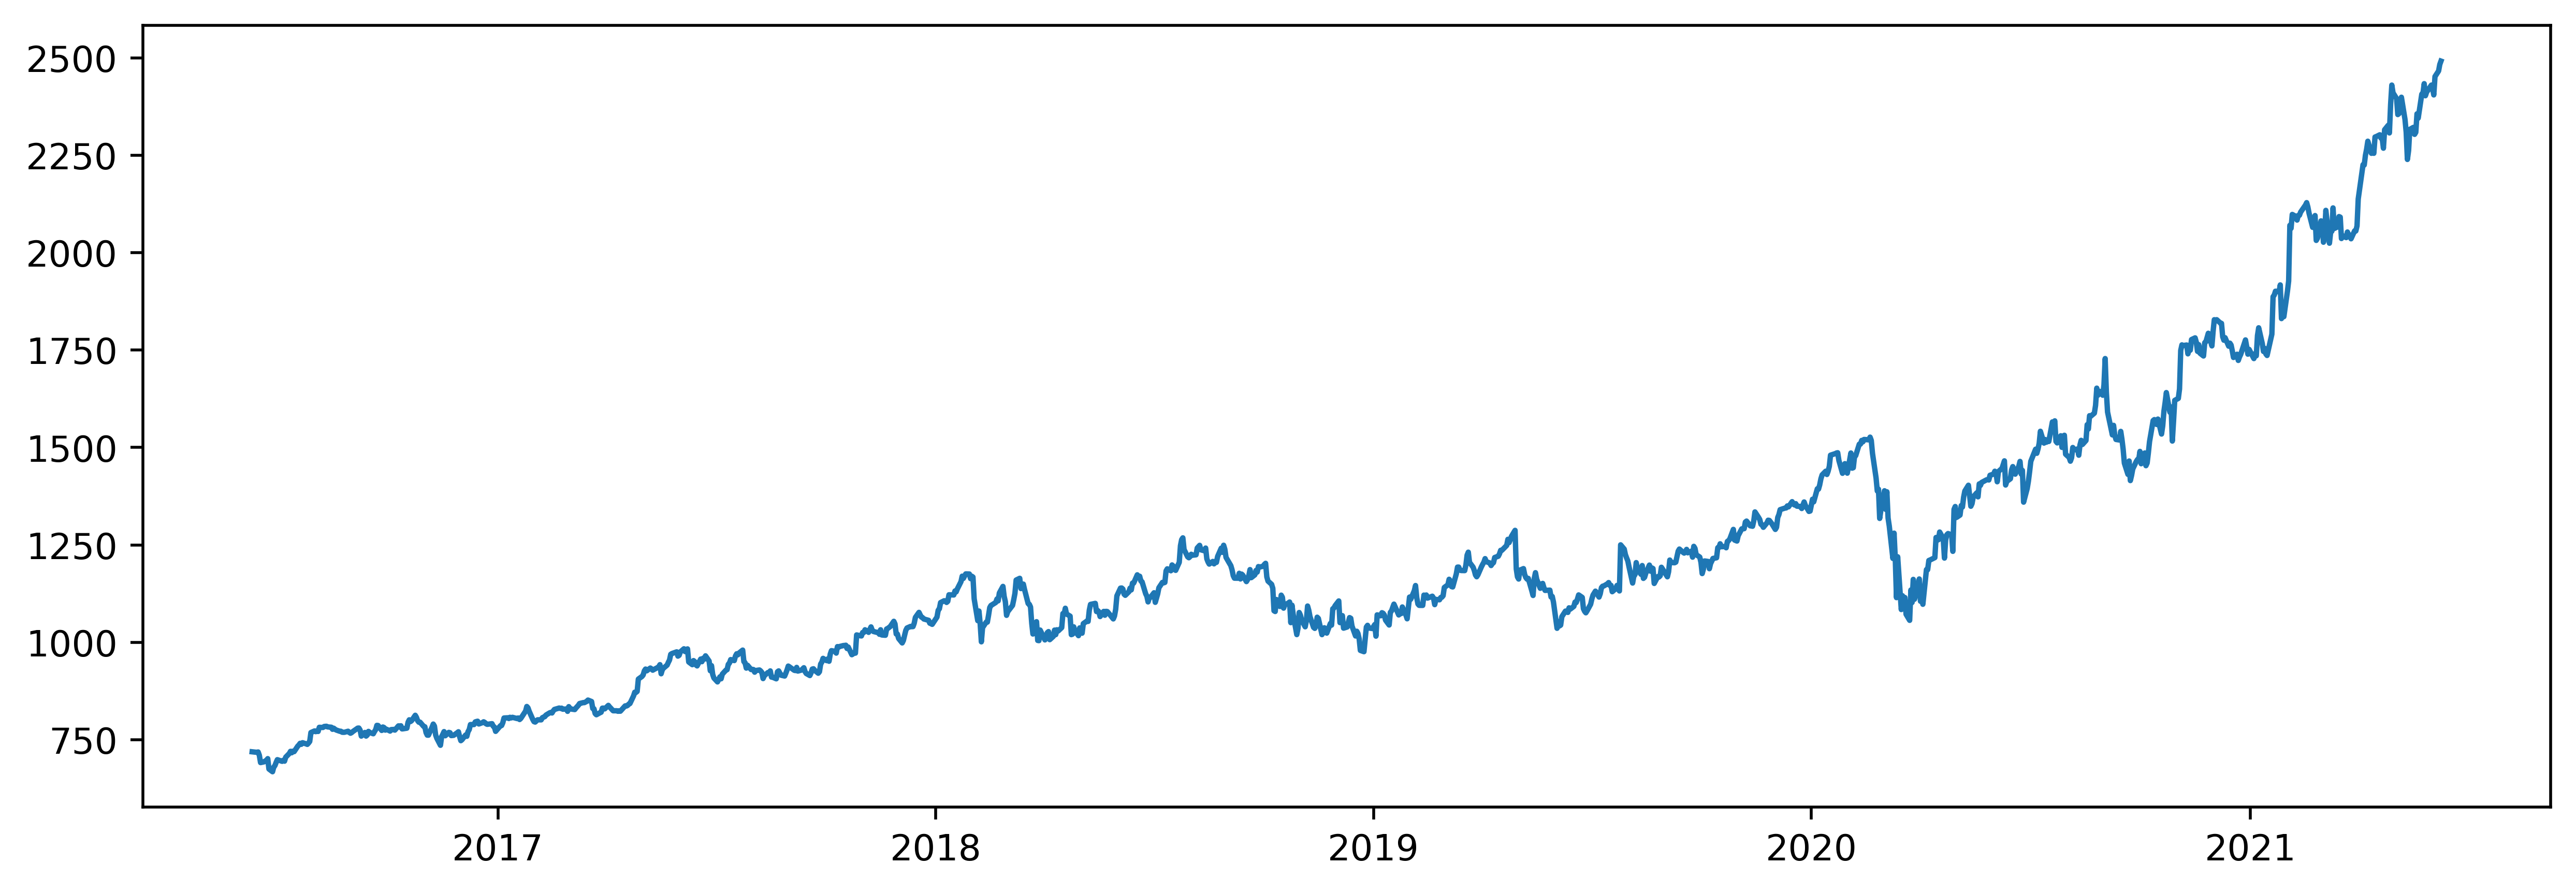

In [90]:
plt.figure(figsize=(12,4),dpi=500)
plt.plot(df.Close)
plt.show()

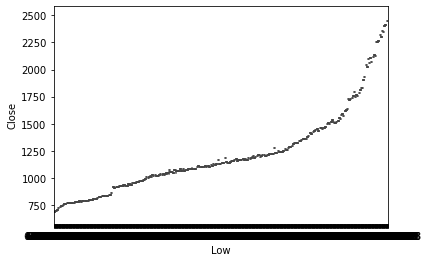

In [91]:
sns.boxplot(x='Low',y='Close',data=df)

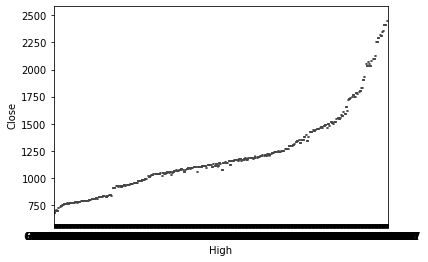

In [12]:
sns.boxplot(x='High',y='Close',data=df)

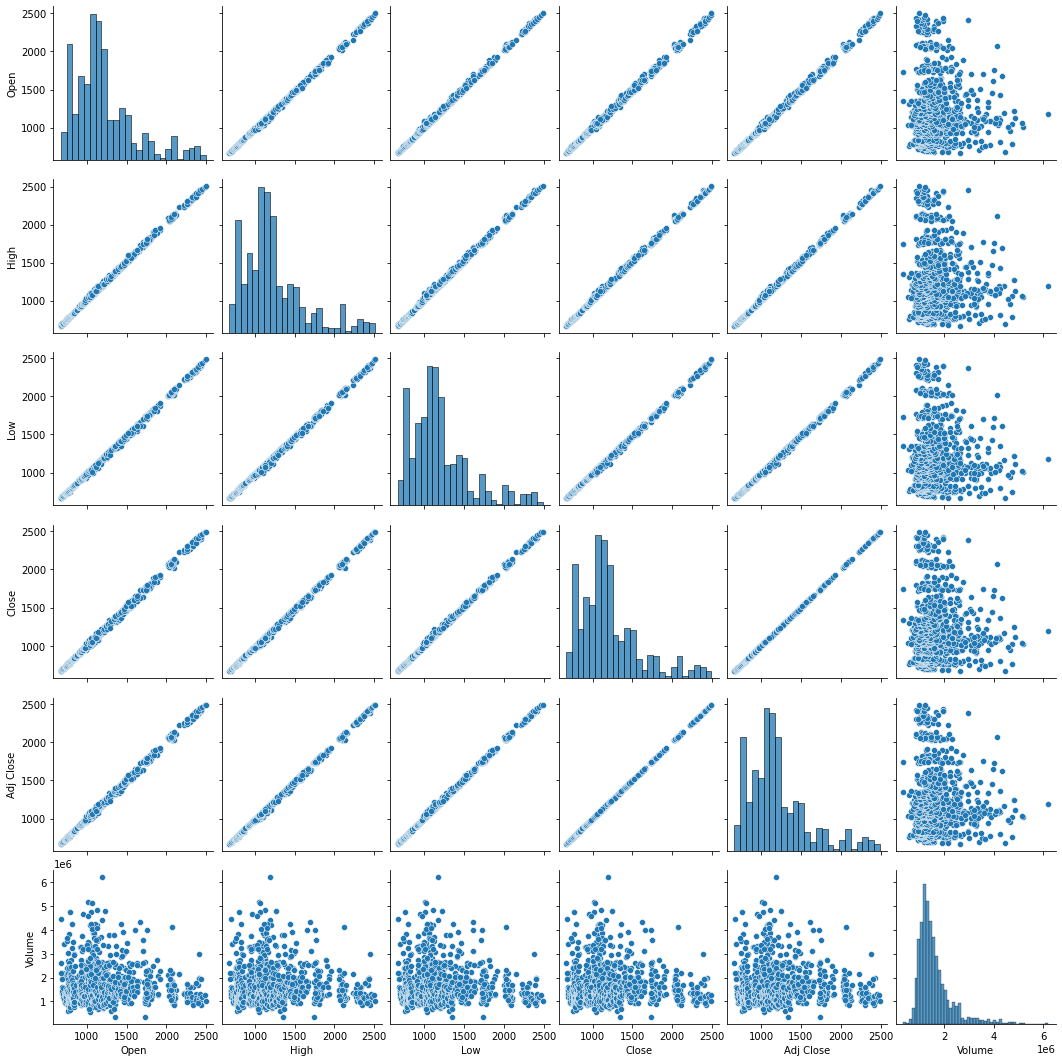

In [92]:
sns.pairplot(df)

In [93]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, svm
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [123]:
X= df.drop("Close",axis=1)
Y= df["Close"]

In [124]:
print(X,Y)

                   Open         High          Low    Adj Close   Volume
Date                                                                   
2016-06-10   719.469971   725.890015   716.429993   719.409973  1216400
2016-06-13   716.510010   725.440002   716.510010   718.359985  1258900
2016-06-14   716.479980   722.469971   713.119995   718.270020  1306100
2016-06-15   719.000000   722.979980   717.309998   718.919983  1214500
2016-06-16   714.909973   716.650024   703.260010   710.359985  1982500
...                 ...          ...          ...          ...      ...
2021-06-03  2395.020020  2409.745117  2382.830078  2404.610107   917300
2021-06-04  2422.520020  2453.858887  2417.770020  2451.760010  1297400
2021-06-07  2451.320068  2468.000000  2441.072998  2466.090088  1192500
2021-06-08  2479.899902  2494.495117  2468.239990  2482.850098  1253000
2021-06-09  2499.500000  2505.000000  2487.330078  2491.399902  1006300

[1258 rows x 5 columns] Date
2016-06-10     719.409973
2016-06-

In [126]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
X = pd.DataFrame(data=scaling.fit_transform(X),columns=X.columns)
print(X)

          Open      High       Low  Adj Close    Volume
0    -1.299596 -1.297105 -1.291053  -1.299586 -0.561034
1    -1.307400 -1.298275 -1.290840  -1.302348 -0.500569
2    -1.307479 -1.306001 -1.299865  -1.302585 -0.433417
3    -1.300835 -1.304674 -1.288710  -1.300875 -0.563737
4    -1.311618 -1.321139 -1.326117  -1.323392  0.528908
...        ...       ...       ...        ...       ...
1253  3.117836  3.082731  3.145600   3.133314 -0.986568
1254  3.190337  3.197474  3.238625   3.257341 -0.445794
1255  3.266266  3.234256  3.300667   3.295036 -0.595037
1256  3.341614  3.303172  3.372997   3.339123 -0.508963
1257  3.393288  3.330496  3.423823   3.361613 -0.859946

[1258 rows x 5 columns]


In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [129]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [130]:
from sklearn.metrics import mean_squared_error,r2_score
Y_train_predict= model.predict(X_train)
rmse= (np.sqrt(mean_squared_error(Y_train,Y_train_predict)))
r2= r2_score(Y_train,Y_train_predict)

In [133]:
output = pd.DataFrame(Y_train[0:10])
output['Prediction'] = Y_train_predict[0:10]
output['Difference'] = output['Prediction'] - output['Close']
print(output)
print("\n \n")
print("Training Performance of Model:","\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
for i in range(len(X.columns)):
    print(X.columns[i], ": ", model.coef_[i])


                  Close   Prediction    Difference
Date                                              
2017-01-27   823.309998   823.309998  0.000000e+00
2018-03-05  1090.930054  1090.930054  0.000000e+00
2018-08-22  1207.329956  1207.329956  0.000000e+00
2020-05-12  1375.739990  1375.739990  0.000000e+00
2020-02-27  1318.089966  1318.089966  0.000000e+00
2018-06-06  1136.880005  1136.880005  0.000000e+00
2019-12-12  1350.270020  1350.270020  0.000000e+00
2017-08-16   926.960022   926.960022  0.000000e+00
2018-12-21   979.539978   979.539978 -1.136868e-13
2018-03-08  1126.000000  1126.000000  0.000000e+00

 

Training Performance of Model: 

RMSE is 1.5623847690366462e-13
R2 score is 1.0
Open :  -2.0799647751284685e-13
High :  5.115907697472721e-13
Low :  -5.684341886080802e-14
Adj Close :  380.15747421840666
Volume :  -6.661338147750939e-15


In [136]:
Y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test,Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

output = pd.DataFrame(Y_test[0:10])
output['Prediction'] = Y_test_predict[0:10]
output['Difference'] = output['Prediction'] - output['Close']
print(output)
print("\n \n")
print("Testing Performance of Model:","\n")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


                  Close   Prediction    Difference
Date                                              
2016-06-17   691.719971   691.719971 -2.273737e-13
2018-05-29  1060.319946  1060.319946  0.000000e+00
2016-08-24   769.640015   769.640015 -2.273737e-13
2020-05-11  1403.260010  1403.260010  0.000000e+00
2017-03-08   835.369995   835.369995 -1.136868e-13
2016-07-07   695.359985   695.359985 -2.273737e-13
2017-09-13   935.090027   935.090027 -2.273737e-13
2018-06-21  1157.660034  1157.660034  0.000000e+00
2017-11-17  1019.090027  1019.090027 -1.136868e-13
2018-09-17  1156.050049  1156.050049  0.000000e+00

 

Testing Performance of Model: 

RMSE is 1.5326488195928792e-13
R2 score is 1.0


<Figure size 2880x1800 with 0 Axes>

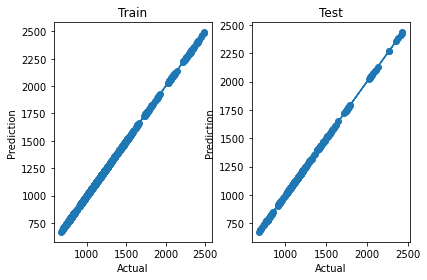

In [140]:
plt.figure(figsize = (40,25))
fig = plt.subplots(1,2)
plt.subplot(1,2,1)
plt.title('Train')
plt.scatter(Y_train, Y_train_predict)
plt.plot(Y_train,Y_train_predict)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.subplot(1,2,2)
plt.tight_layout()
plt.scatter(Y_test, Y_test_predict)
plt.plot(Y_test,Y_test_predict)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Test')
plt.show()

LSTM approach


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import cv2 
import io

In [23]:
from google.colab import files
uploaded = files.upload()

Saving GOOG_train.csv to GOOG_train (6).csv


In [24]:
df2 = pd.read_csv("GOOG_train.csv", index_col = "Date", parse_dates = True)
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-10,719.469971,725.890015,716.429993,719.409973,719.409973,1216400
2016-06-13,716.510010,725.440002,716.510010,718.359985,718.359985,1258900
2016-06-14,716.479980,722.469971,713.119995,718.270020,718.270020,1306100
2016-06-15,719.000000,722.979980,717.309998,718.919983,718.919983,1214500
2016-06-16,714.909973,716.650024,703.260010,710.359985,710.359985,1982500


In [25]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1212.412150,1224.570048,1201.347431,1213.457483,1213.457483,1.610740e+06
std,379.454923,384.609149,375.747847,380.308660,380.308660,7.031610e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,957.377518,963.404984,950.767502,958.119980,958.119980,1.184300e+06
50%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,1.423200e+06
75%,1357.785034,1372.300995,1346.885010,1358.957519,1358.957519,1.823950e+06
max,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,6.207000e+06


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-06-10 to 2021-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [29]:
df2["Close"] =  df2["Close"].astype(float)

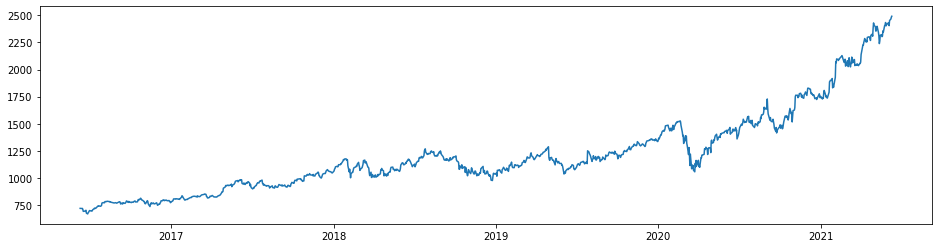

In [30]:
plt.figure(figsize = (16,4))
plt.plot(df2.index, df2["Close"])

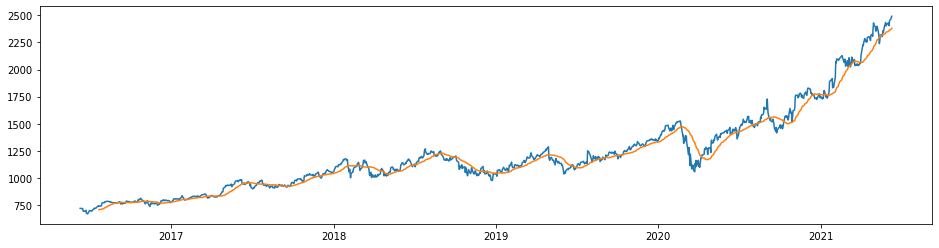

In [31]:
df2["Close-30Days"] = df2["Close"].rolling(window = 30).mean()
plt.figure(figsize = (16,4))
plt.plot(df2.index, df2["Close"])
plt.plot(df2.index, df2["Close-30Days"])

In [32]:
df2.rolling(window = 30).mean().head(90)

,Open,High,Low,Close,Adj Close,Volume,Close-30Days
Date,,,,,,,
2016-06-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2016-10-11,773.991667,778.458529,769.807068,774.285335,774.285335,1.280757e+06,772.865678
2016-10-12,774.472666,778.913995,770.314400,774.853668,774.853668,1.274337e+06,773.101445
2016-10-13,774.946332,779.318327,770.568400,775.225002,775.225002,1.278227e+06,773.320856


In [34]:
X_train = df2["Close"]
X_train = pd.DataFrame(X_train)
X_train.head()

,Close
Date,
2016-06-10,719.409973
2016-06-13,718.359985
2016-06-14,718.270020
2016-06-15,718.919983
2016-06-16,710.359985


In [36]:
scaler = MinMaxScaler(feature_range = (0,1))
X_train_scaled = scaler.fit_transform(X_train)
print(X_train_scaled)

[[0.02805597]
 [0.02748005]
 [0.0274307 ]
 ...
 [0.98611746]
 [0.9953104 ]
 [1.        ]]


In [37]:
print(X_train_scaled.shape)

(1258, 1)


In [40]:
X_train_scaled_final = []
Y_train_scaled_final = []

In [42]:

for i in range(30,1258):
  X_train_scaled_final.append(X_train_scaled[i-30:i,0])
  Y_train_scaled_final.append(X_train_scaled[i,0])

X_train_scaled = np.array(X_train_scaled_final)
Y_train_scaled = np.array(Y_train_scaled_final)

In [43]:
print(X_train_scaled.shape)

(1228, 30)


In [44]:
X_train_scaled= X_train_scaled.reshape(1228,30,1)

In [46]:
print(Y_train_scaled.shape)

(1228,)


In [90]:
lstm = Sequential()
lstm.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_scaled.shape[1], 1)))
lstm.add(Dropout(0.15))
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.15))
lstm.add(LSTM(units = 50, return_sequences = True))
lstm.add(Dropout(0.15))
lstm.add(LSTM(units = 50))
lstm.add(Dropout(0.15))
lstm.add(Dense(units = 1))

In [91]:
lstm.compile(optimizer = "adam", loss = "mean_squared_error")
lstm.fit(X_train_scaled, Y_train_scaled, epochs = 10, batch_size = 30)

Epoch 1/10
41/41 [==============================] - 5s 11ms/step - loss: 0.0144
Epoch 2/10
41/41 [==============================] - 0s 11ms/step - loss: 0.0029
Epoch 3/10
41/41 [==============================] - 0s 11ms/step - loss: 0.0025
Epoch 4/10
41/41 [==============================] - 0s 11ms/step - loss: 0.0020
Epoch 5/10
41/41 [==============================] - 0s 11ms/step - loss: 0.0021
Epoch 6/10
41/41 [==============================] - 0s 11ms/step - loss: 0.0022
Epoch 7/10
41/41 [==============================] - 0s 11ms/step - loss: 0.0024
Epoch 8/10
41/41 [==============================] - 0s 11ms/step - loss: 0.0019
Epoch 9/10
41/41 [==============================] - 0s 11ms/step - loss: 0.0019
Epoch 10/10
41/41 [==============================] - 0s 11ms/step - loss: 0.0021


In [92]:
X_train = pd.DataFrame(X_train)

In [93]:
from google.colab import files
uploaded = files.upload()

Saving GOOG_test.csv to GOOG_test (3).csv


In [94]:
df2_test = pd.read_csv("GOOG_test.csv", index_col = "Date", parse_dates = True)
df2_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-10,2494.010010,2523.260010,2494.000000,2521.600098,2521.600098,1561700
2021-06-11,2524.919922,2526.989990,2498.290039,2513.929932,2513.929932,1262000
2021-06-14,2513.389893,2528.229980,2500.939941,2527.040039,2527.040039,1127500
2021-06-15,2530.439941,2537.239990,2512.969971,2520.659912,2520.659912,1109100
2021-06-16,2524.949951,2530.469971,2482.999023,2513.929932,2513.929932,1315800


In [96]:
Actual_price = df2_test["Close"]

In [97]:
df2_test = pd.DataFrame(df2_test["Close"])

In [98]:
print(df2_test)

                  Close
Date                   
2021-06-10  2521.600098
2021-06-11  2513.929932
2021-06-14  2527.040039
2021-06-15  2520.659912
2021-06-16  2513.929932
...                 ...
2022-06-03  2291.280029
2022-06-06  2340.209961
2022-06-07  2344.590088
2022-06-08  2344.760010
2022-06-09  2298.360107

[253 rows x 1 columns]


In [99]:
dataset = pd.concat((X_train, df2_test), axis = 0)
new = dataset[len(dataset) - len(df2_test) - 30:].values
new = new.reshape(-1,1)
new = scaler.transform(new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [100]:
X_test = []
for i in range(30,283):
  X_test.append(new[i - 30: i, 0])
X_test= np.array(X_test)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
prediction_price= lstm.predict(X_test)
prediction_price= scaler.inverse_transform(prediction_price)

In [101]:
prediction_price= pd.DataFrame(prediction_price)
prediction_price["Close"]= prediction_price
prediction_price.drop(columns=[0])

,Close
0,2424.559326
1,2434.600586
2,2445.166992
3,2455.937500
4,2466.797363
...,...
248,2272.627930
249,2267.921631
250,2265.906006
251,2267.358887


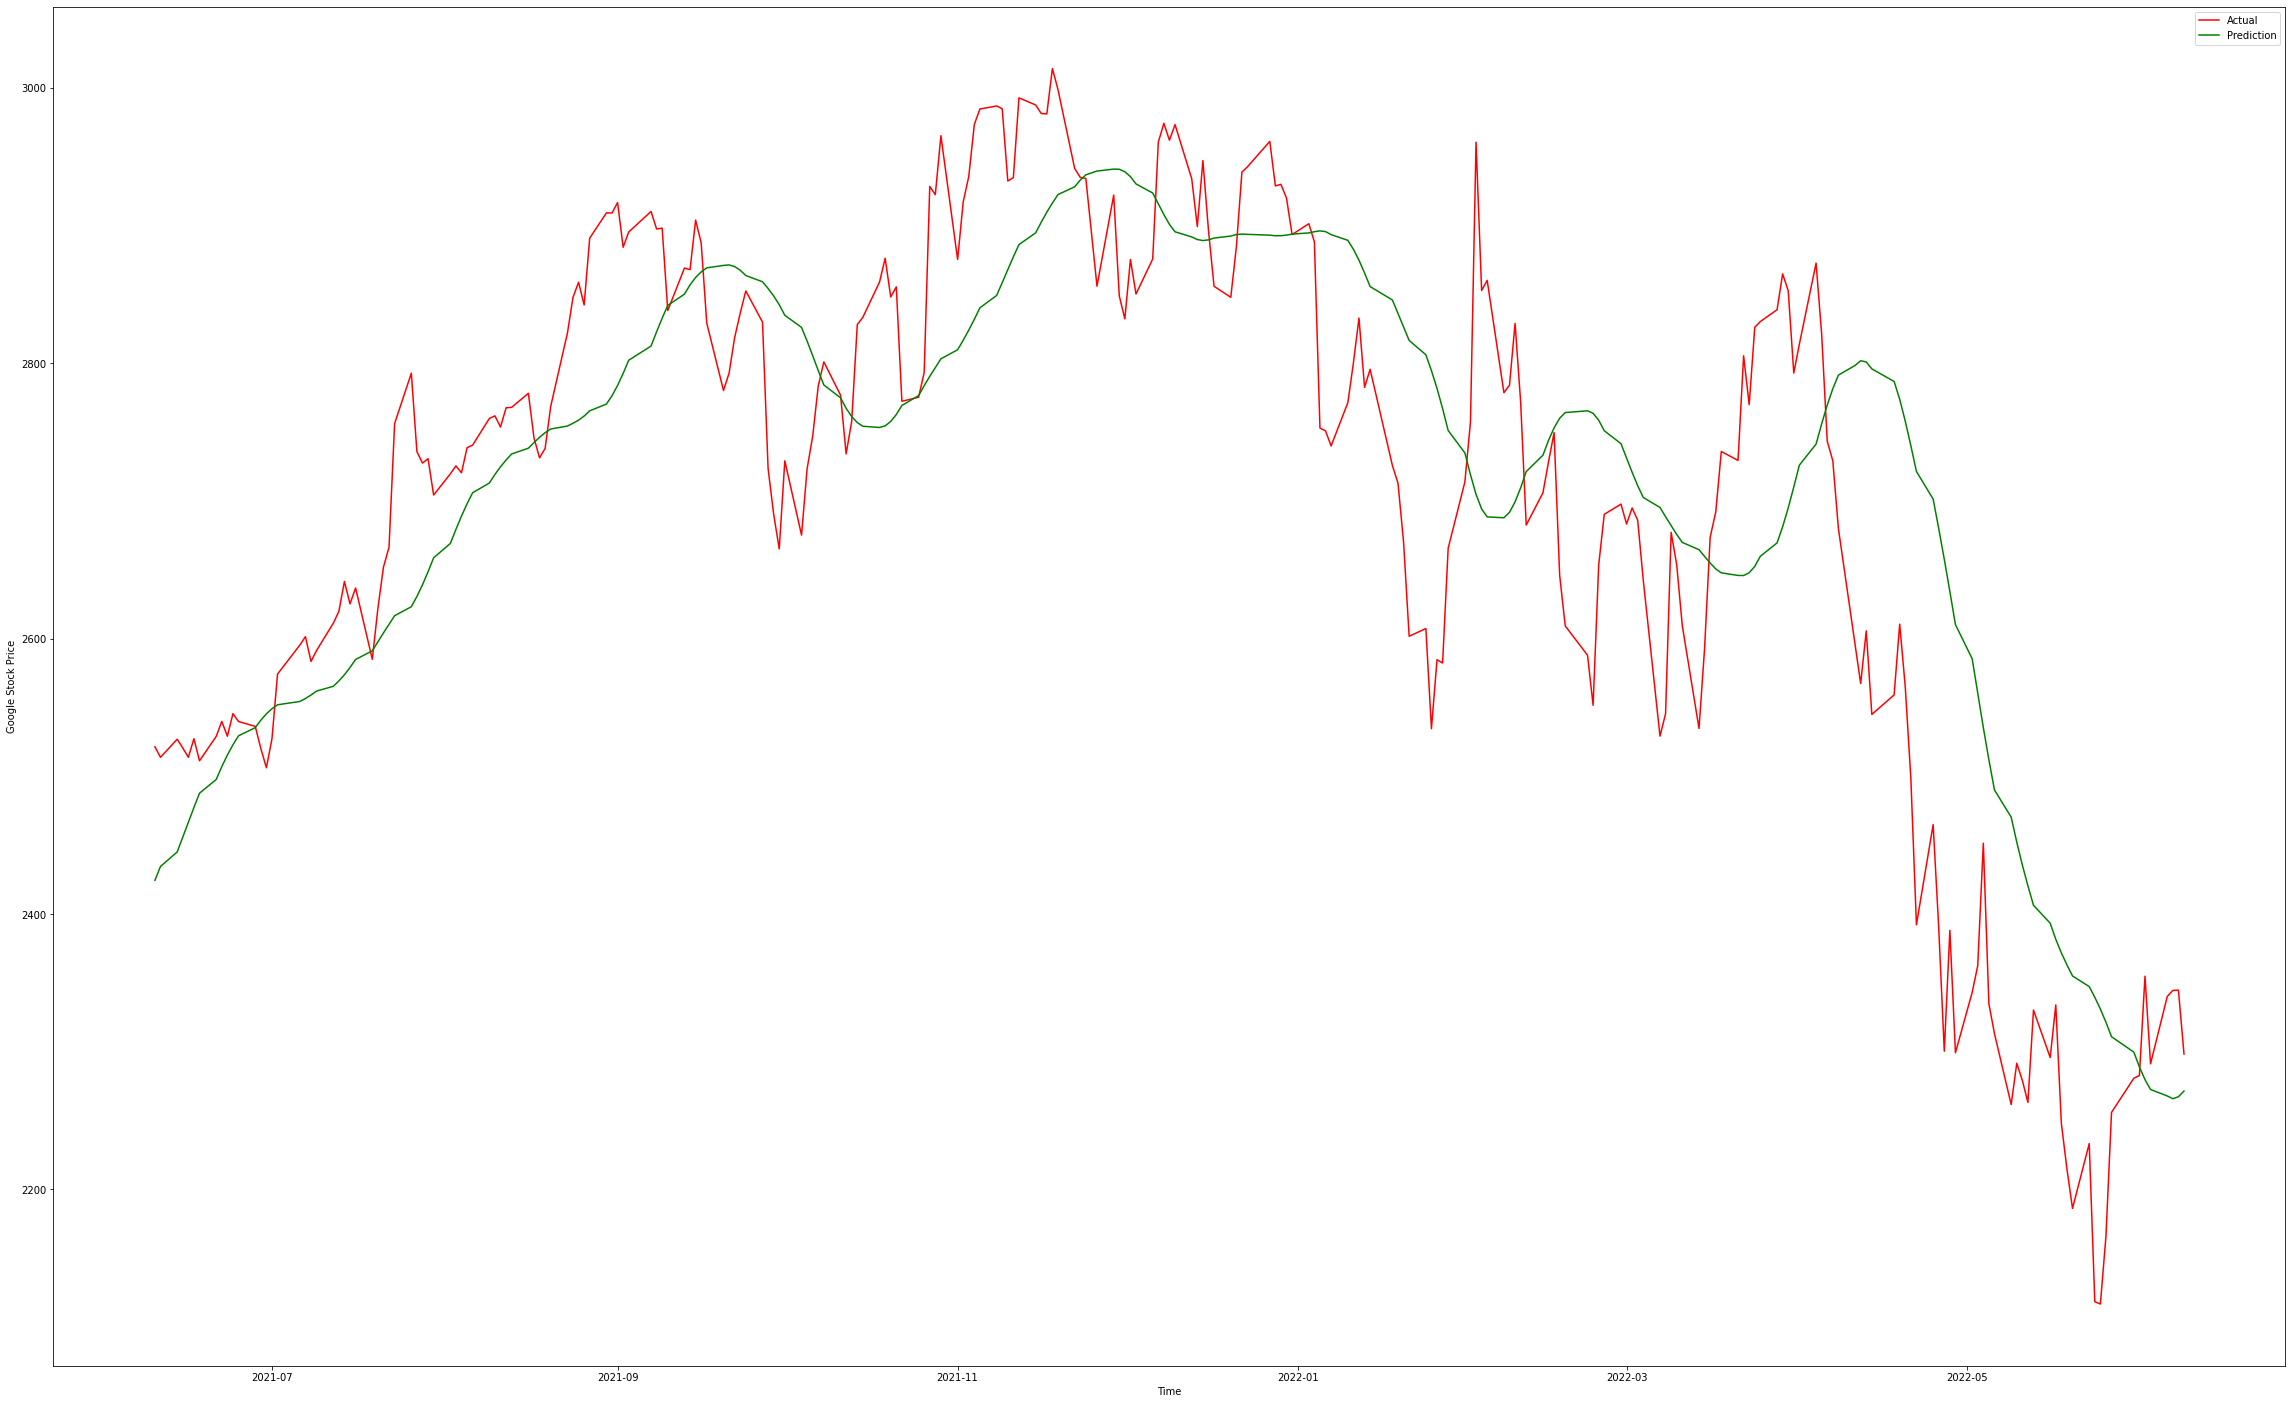

In [102]:
plt.figure(figsize = (40,25))
plt.plot(df2_test.index,Actual_price,color = 'red', label = 'Actual')
plt.plot(df2_test.index, prediction_price["Close"], color = 'green', label = 'Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

ARIMA Model

In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 6.6 MB/s 
     |████████████████████████████████| 9.8 MB 52.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
from google.colab import files
uploaded = files.upload()

Saving GOOG_train.csv to GOOG_train.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
df3 = pd.read_csv("GOOG_train.csv", index_col = "Date", parse_dates = True)
df3.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-10,719.469971,725.890015,716.429993,719.409973,719.409973,1216400
2016-06-13,716.510010,725.440002,716.510010,718.359985,718.359985,1258900
2016-06-14,716.479980,722.469971,713.119995,718.270020,718.270020,1306100
2016-06-15,719.000000,722.979980,717.309998,718.919983,718.919983,1214500
2016-06-16,714.909973,716.650024,703.260010,710.359985,710.359985,1982500


In [11]:
df3.info()
print("\n")
df3.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-06-10 to 2021-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB




,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1212.412150,1224.570048,1201.347431,1213.457483,1213.457483,1.610740e+06
std,379.454923,384.609149,375.747847,380.308660,380.308660,7.031610e+05
min,671.000000,672.299988,663.283997,668.260010,668.260010,3.468000e+05
25%,957.377518,963.404984,950.767502,958.119980,958.119980,1.184300e+06
50%,1130.574951,1142.984985,1117.374024,1132.005005,1132.005005,1.423200e+06
75%,1357.785034,1372.300995,1346.885010,1358.957519,1358.957519,1.823950e+06
max,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,6.207000e+06


In [12]:
df3.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-03,2395.020020,2409.745117,2382.830078,2404.610107,2404.610107,917300
2021-06-04,2422.520020,2453.858887,2417.770020,2451.760010,2451.760010,1297400
2021-06-07,2451.320068,2468.000000,2441.072998,2466.090088,2466.090088,1192500
2021-06-08,2479.899902,2494.495117,2468.239990,2482.850098,2482.850098,1253000
2021-06-09,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,1006300


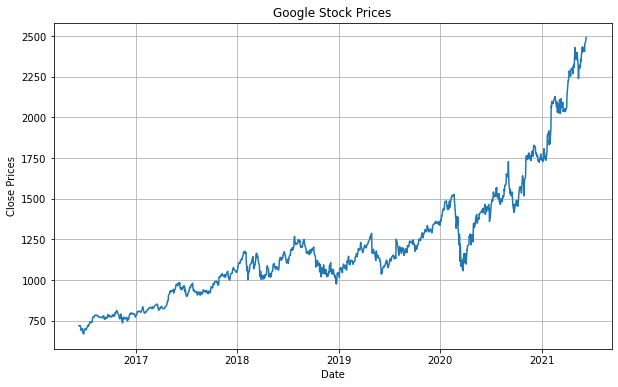

In [29]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df3['Close'])
plt.title('Google Stock Prices')
plt.show()

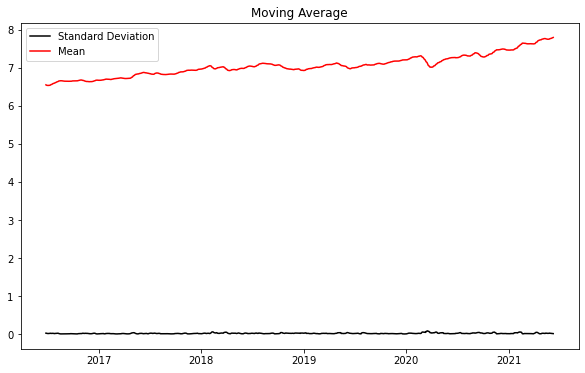

In [31]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df3_close = df3['Close']
df3_log = np.log(df3_close)
moving_avg = df3_log.rolling(12).mean()
std_dev = df3_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

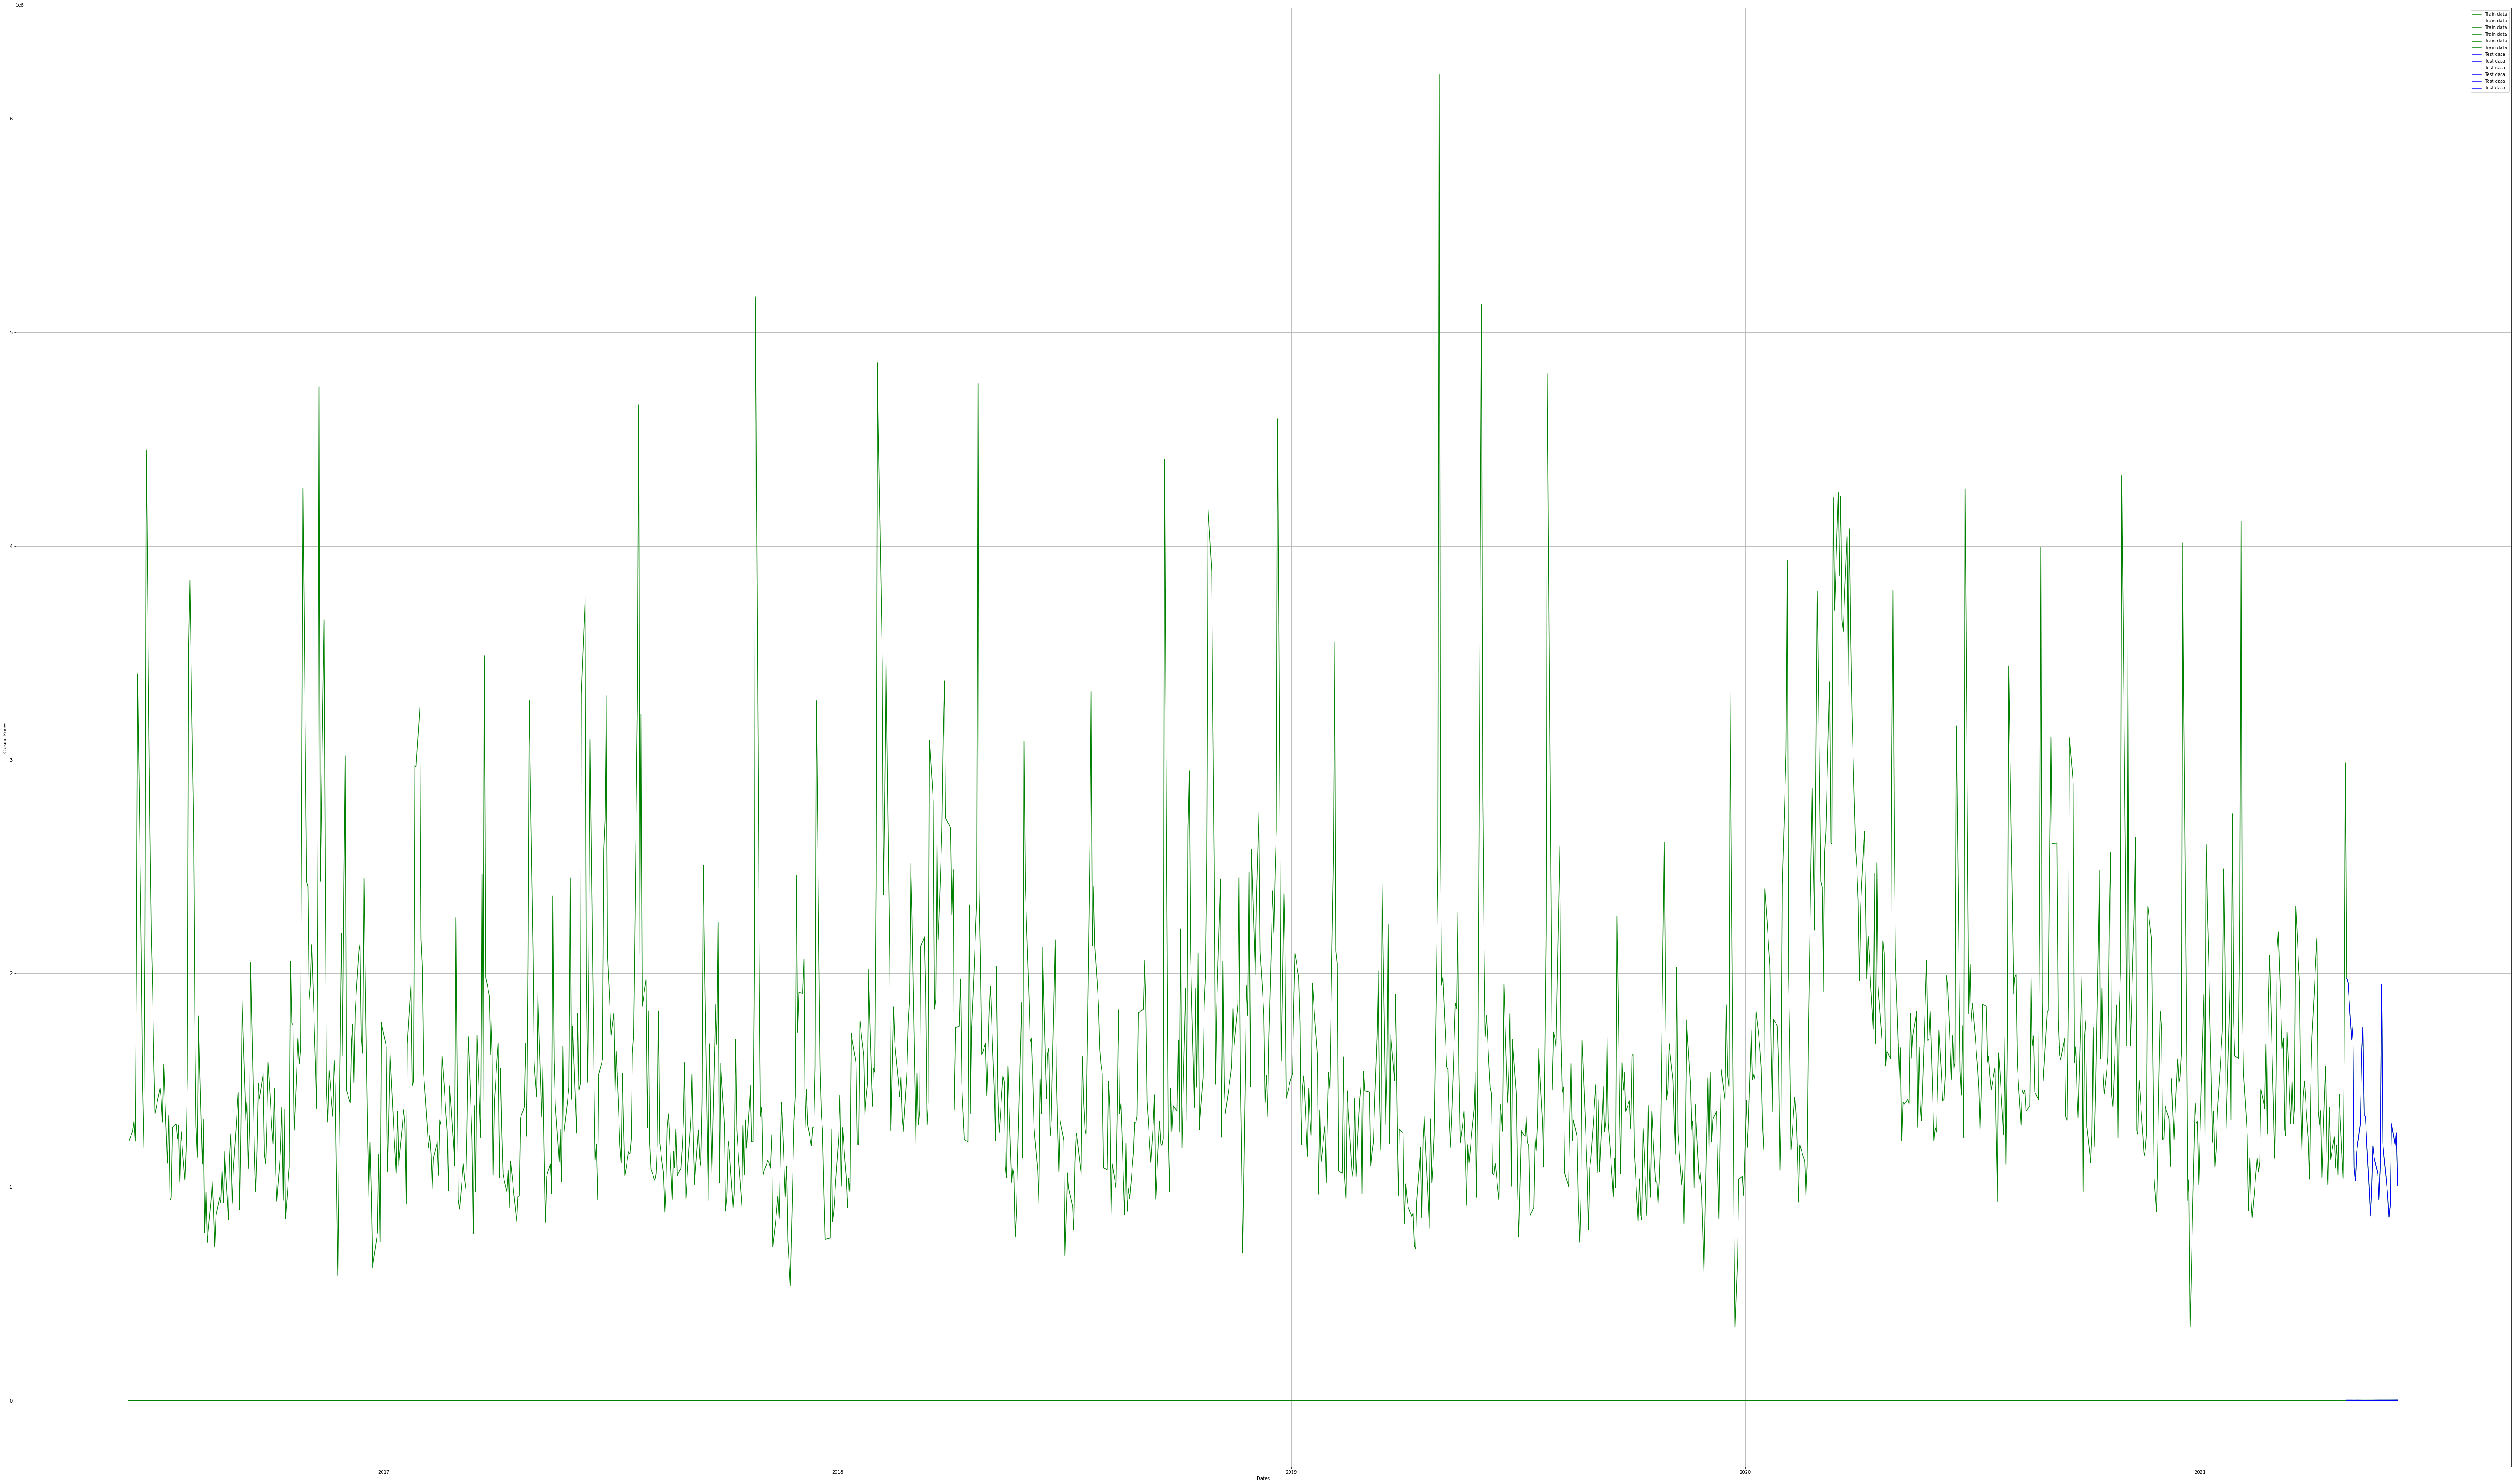

In [59]:
train_data, test_data = df3[:1228], df3[1229:]
plt.figure(figsize=(100,60))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df3, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [60]:
print(train_data.shape)
print(test_data.shape)

(1228, 6)
(29, 6)


In [36]:
from pmdarima.arima import auto_arima

In [37]:
from statsmodels.tsa.stattools import adfuller

next= adfuller(df3.Close.dropna())
print(f"ADF Statistic: {next[0]}")
print(f"p-value: {next[1]}")

ADF Statistic: 1.9368159937737082
p-value: 0.9985850027950328


In [38]:
from statsmodels.graphics.tsaplots import plot_acf

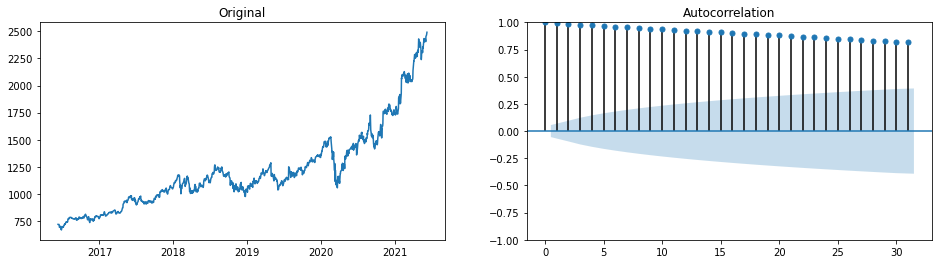

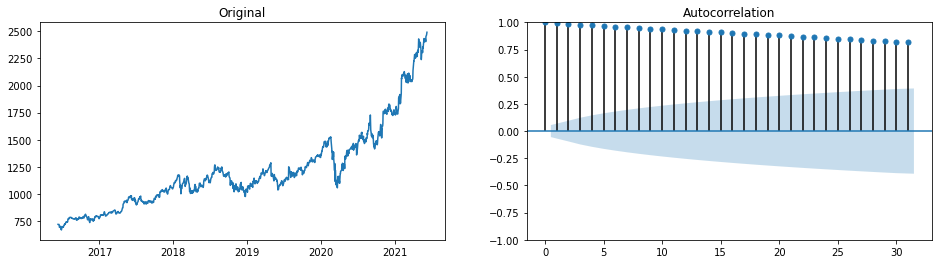

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(df3.Close)
ax1.set_title("Original")
plot_acf(df3.Close, ax=ax2)

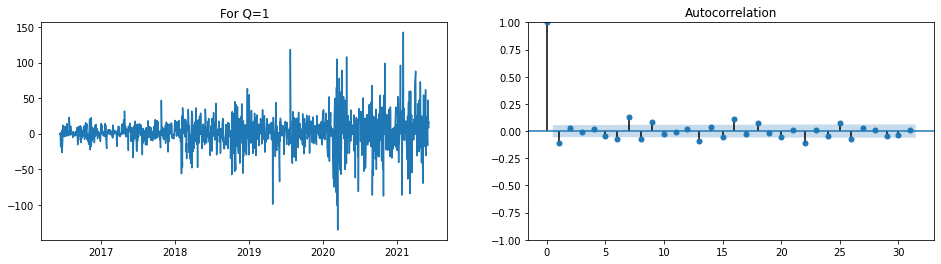

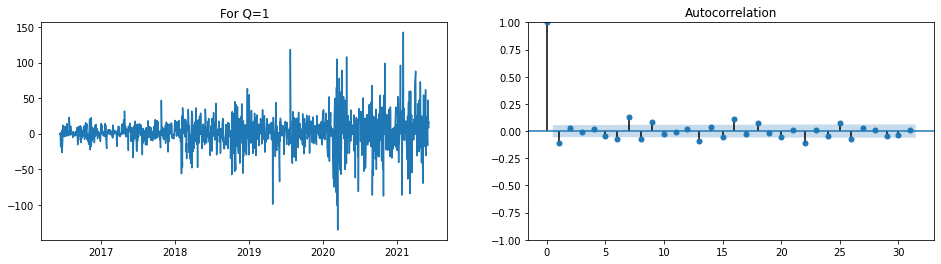

In [16]:
dif= df3.Close.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
ax1.plot(dif)
ax1.set_title("For Q=1")
plot_acf(dif, ax=ax2)

In [40]:
stepwise_fit = auto_arima(df3['Close'], trace=True,
suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11344.912, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11352.162, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11339.446, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11340.105, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11355.272, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11341.026, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11340.960, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11342.904, Time=0.88 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=11343.758, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 2.995 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -5666.723
Date:                Tue, 19 Jul 2022   AIC                          11339.446
Time:                        11:12:32   BIC                          11354.855
Sample:                             0   HQIC                         11345.237
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5632      0.622      2.512      0.012       0.343       2.783
ar.L1         -0.1079      0.017     -6.468      0.000      -0.141      -0.075
sigma2       482.5873      9.404     51.315      0.000     464.155     501.020
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2176.84
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               9.42   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
df3.shape

(1258, 6)

In [61]:
print(train_data.shape)
test_data.shape

(1228, 6)


(29, 6)

In [21]:
import statsmodels.api as sm

In [62]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data.Close, order=(1, 1, 0))
model = model.fit()



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1228
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -5511.339
Date:                Tue, 19 Jul 2022   AIC                          11026.678
Time:                        11:22:24   BIC                          11036.903
Sample:                             0   HQIC                         11030.525
                               - 1228                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1167      0.016     -7.095      0.000      -0.149      -0.084
sigma2       467.0141      8.958     52.135      0.000     449.457     484.571
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2494.61
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              11.66   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


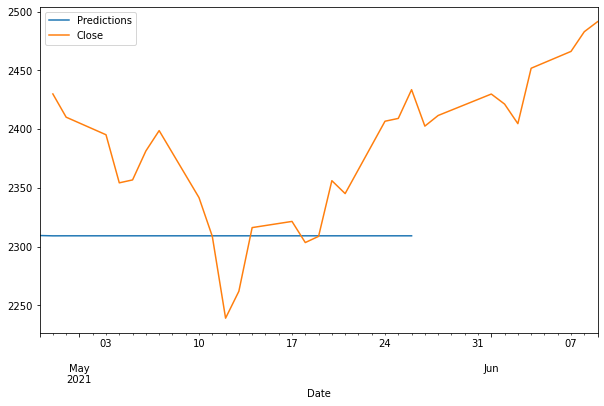

In [80]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
index_future_dates=pd.date_range(start='2021-04-28',end='2021-05-26')
pred=model.predict(start=start,end=end,typ='levels').rename('Predictions')
pred.index=index_future_dates
pred.plot(legend=True)
test_data['Close'].plot(legend=True)

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_data['Close'].mean()
rmse=sqrt(mean_squared_error(pred,test_data['Close']))
print(rmse)

94.73180982428939


In [82]:
test_data["Close"].mean()

2380.680007448276

In [83]:
train_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-21,2285.250000,2295.320068,2258.570068,2293.290039,2293.290039,1196500
2021-04-22,2293.229980,2303.761963,2256.449951,2267.919922,2267.919922,1054800
2021-04-23,2283.469971,2325.820068,2278.209961,2315.300049,2315.300049,1433500
2021-04-26,2319.929932,2341.260010,2313.840088,2326.739990,2326.739990,1041700
2021-04-27,2336.000000,2337.449951,2304.270020,2307.120117,2307.120117,1598600


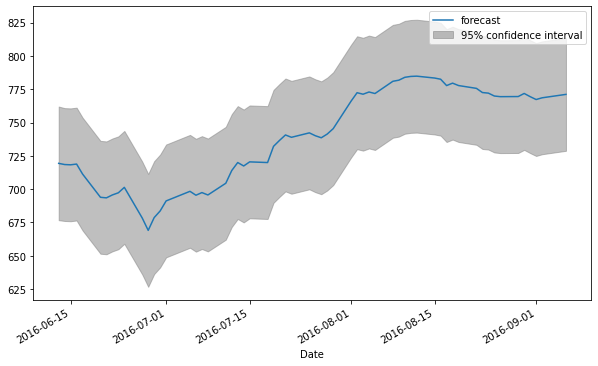

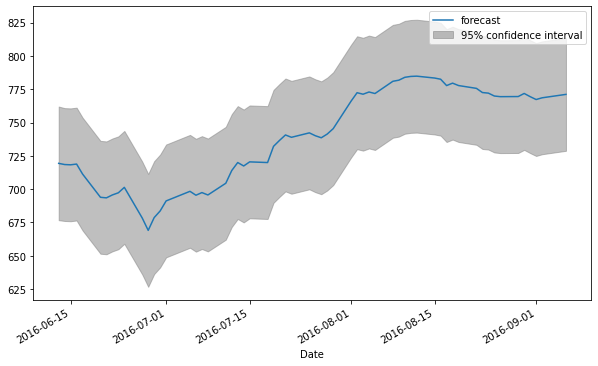

In [71]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model,
    start=1,
    end=60,
    dynamic=False,)

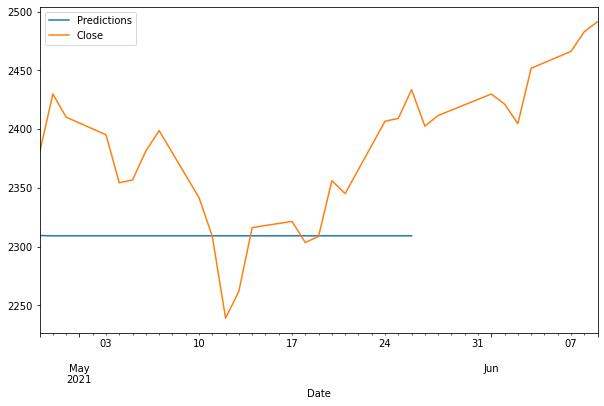

In [72]:
pred.plot(legend='Predictions')
df3_test['Close'].plot(legend=True)

In [73]:
model2=ARIMA(df3['Close'],order=(1,1,0))
model2=model2.fit()
df3.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-03,2395.020020,2409.745117,2382.830078,2404.610107,2404.610107,917300
2021-06-04,2422.520020,2453.858887,2417.770020,2451.760010,2451.760010,1297400
2021-06-07,2451.320068,2468.000000,2441.072998,2466.090088,2466.090088,1192500
2021-06-08,2479.899902,2494.495117,2468.239990,2482.850098,2482.850098,1253000
2021-06-09,2499.500000,2505.000000,2487.330078,2491.399902,2491.399902,1006300


In [74]:
index_future_dates=pd.date_range(start='2021-06-09',end='2021-07-09')
print(index_future_dates)
pred=model2.predict(start=len(df3),end=len(df3)+30,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

DatetimeIndex(['2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
               '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20',
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
               '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06',
               '2021-07-07', '2021-07-08', '2021-07-09'],
              dtype='datetime64[ns]', freq='D')
2021-06-09    2490.516084
2021-06-10    2490.607447
2021-06-11    2490.598003
2021-06-12    2490.598979
2021-06-13    2490.598878
2021-06-14    2490.598888
2021-06-15    2490.598887
2021-06-16    2490.598888
2021-06-17    2490.598887
2021-06-18    2490.598887
2021-06-19    2490.598887
2021-06-20    2490.598887
2021-06-21    2490.598887
2021-06-22    2490.598887
2021-06-23    2490.598887
2021-06

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


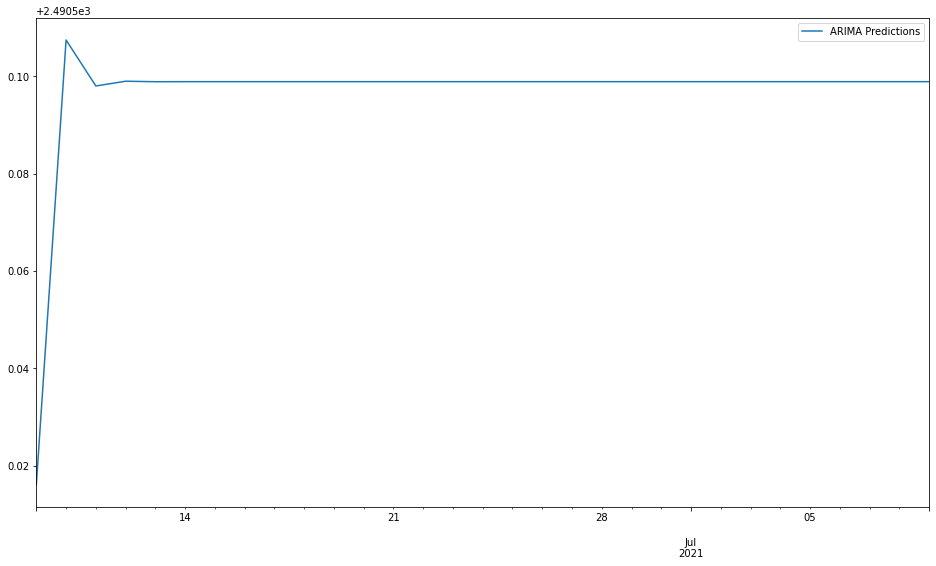

In [75]:
pred.plot(figsize=(16,9),legend=True)

In [84]:
from google.colab import files
uploaded = files.upload()

Saving GOOG_test.csv to GOOG_test.csv


In [85]:
df4 = pd.read_csv("GOOG_test.csv", index_col = "Date", parse_dates = True)
df4.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-10,2494.010010,2523.260010,2494.000000,2521.600098,2521.600098,1561700
2021-06-11,2524.919922,2526.989990,2498.290039,2513.929932,2513.929932,1262000
2021-06-14,2513.389893,2528.229980,2500.939941,2527.040039,2527.040039,1127500
2021-06-15,2530.439941,2537.239990,2512.969971,2520.659912,2520.659912,1109100
2021-06-16,2524.949951,2530.469971,2482.999023,2513.929932,2513.929932,1315800


In [86]:
model2=ARIMA(df4['Close'],order=(1,1,0))
model2=model2.fit()
df4.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-03,2319.850098,2327.290039,2273.360107,2291.280029,2291.280029,1252600
2022-06-06,2334.850098,2387.969971,2330.565918,2340.209961,2340.209961,1189300
2022-06-07,2312.959961,2354.972900,2302.510010,2344.590088,2344.590088,1320700
2022-06-08,2337.530029,2372.919922,2333.935059,2344.760010,2344.760010,1127200
2022-06-09,2326.830078,2367.000000,2297.340088,2298.360107,2298.360107,1157100


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


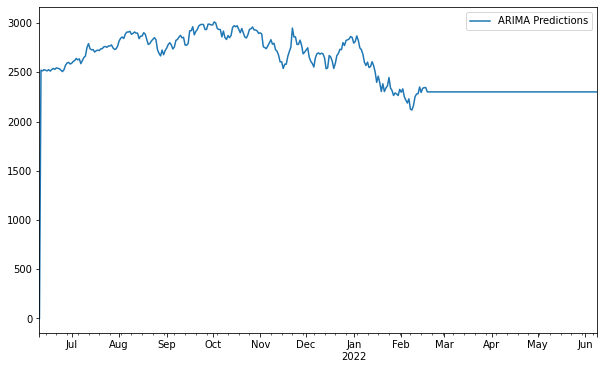

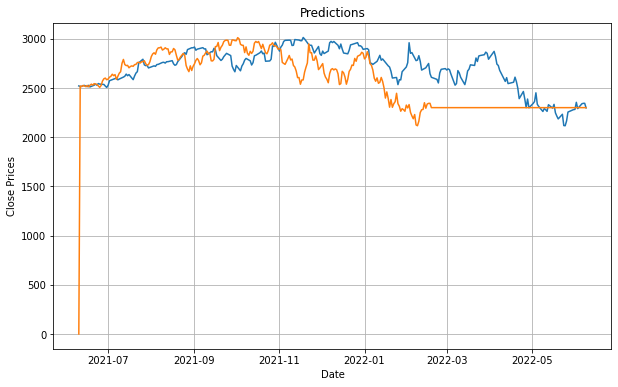

In [88]:
index_future_dates=pd.date_range(start='2021-06-10',end='2022-06-09')
pred=model2.predict(start=0,end=len(df4)+111,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
pred.plot(legend=True)
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df4['Close'])
plt.plot(pred)
plt.title('Predictions')
plt.show()